# Taller 2: operaciones de transformación del histograma

## Cargue y visualice las imágenes de trabajo.

In [1]:
PATH = './imagenes/'

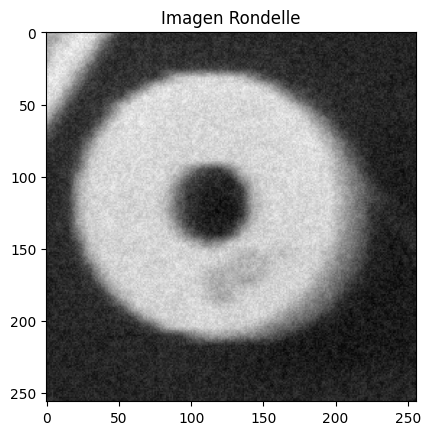

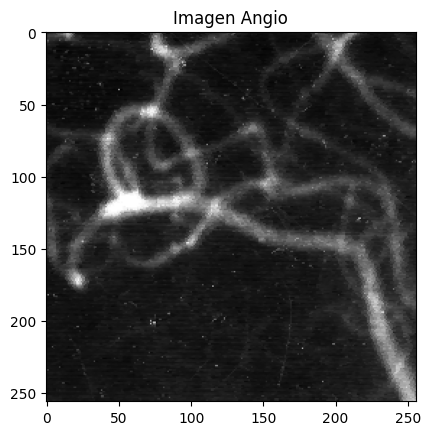

In [2]:
import cv2
import matplotlib.pyplot as plt

imagen_RONDELLE = cv2.imread(PATH + 'RONDELLE.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(imagen_RONDELLE, cmap='gray')
plt.title('Imagen Rondelle')
plt.show()

imagen_ANGIO = cv2.imread(PATH + 'ANGIO.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(imagen_ANGIO, cmap='gray')
plt.title('Imagen Angio')
plt.show()

## Se desea aplicar una umbralización doble de tal manera que la imagen resultante debe contener tres clases, cuyos niveles de gris son 0, 128 y 255 respectivamente. Para esto debe utilizar las funciones de umbralización simple y umbralización doble.

Iniciamos visualizando los histogramas originales.

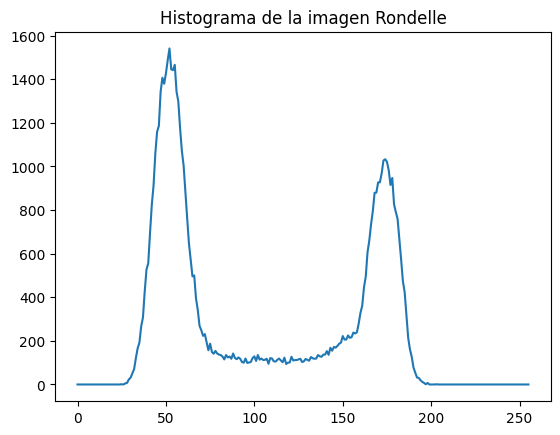

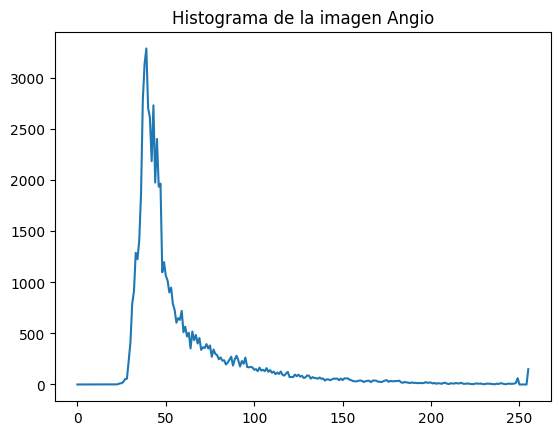

In [4]:
hist_RONDELLE = cv2.calcHist([imagen_RONDELLE], [0], None, [256], [0, 256])
hist_ANGIO = cv2.calcHist([imagen_ANGIO], [0], None, [256], [0, 256])
plt.plot(hist_RONDELLE)
plt.title('Histograma de la imagen Rondelle')
plt.show()
plt.plot(hist_ANGIO)
plt.title('Histograma de la imagen Angio')
plt.show()

Utilizamos la umbralización simple y la umbralización doble para obtener una imagen resultante con tres clases (0, 128, 255). Se mapean los valores de la siguiente forma:
- **Clase 0**: píxeles < S1 → valor 0
- **Clase 1**: píxeles entre S1 y S2 → valor 128
- **Clase 2**: píxeles > S2 → valor 255

In [6]:
import numpy as np

def umbralizacion_doble(imagen, S1, S2):
    # Clase 0 (≤ S1) → 0 (ya está en la imagen3clases)
    imagen_3clases = np.zeros_like(imagen)
    # Clase 1 (entre S1 y S2) → 128, usando inRange
    mascara_media = cv2.inRange(imagen, S1, S2)
    imagen_3clases[mascara_media == 255] = 128
    # Clase 2 (> S2) → 255, usando threshold
    _, mascara_alta = cv2.threshold(imagen, S2, 255, cv2.THRESH_BINARY)
    imagen_3clases[mascara_alta == 255] = 255
    return imagen_3clases

La función `umbralizacion_doble` inicia definiendo una imagen resultado `imagen_3clases` con el mismo tamaño que la imagen de entrada, pero inicializada a cero (clase 0). Luego, se crean dos máscaras: `mascara_media` para los píxeles entre S1 y S2, y `mascara_alta` para los píxeles mayores a S2. La función asigna el valor 128 a los píxeles que cumplen la condición de la máscara media y el valor 255 a los píxeles que cumplen la condición de la máscara alta. Finalmente, devuelve la imagen resultante con las tres clases.

## Aplique esta umbralización doble sobre las imágenes de trabajo rondelle.png y angio.png, utilizando como umbrales bajo y alto los valores 70 y 140 respectivamente. Visualice el resultado.

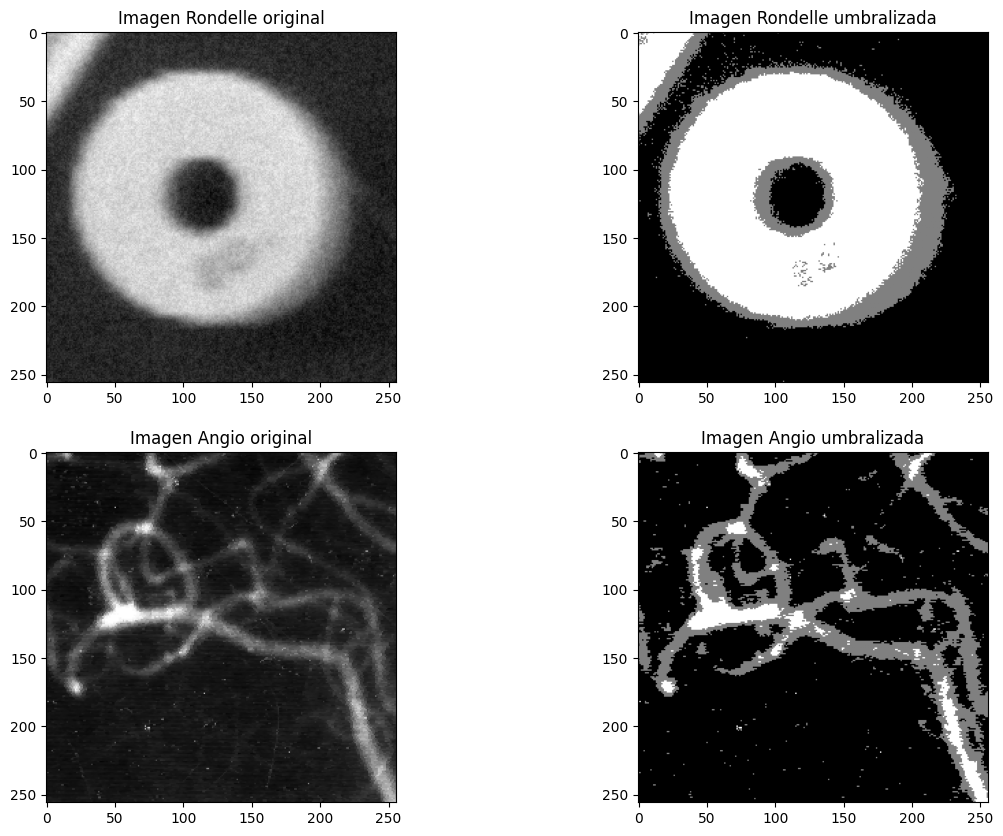

In [10]:
imagen_RONDELLE_umbralizada = umbralizacion_doble(imagen_RONDELLE, 70, 140)
imagen_ANGIO_umbralizada = umbralizacion_doble(imagen_ANGIO, 70, 140)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs[0, 0].imshow(imagen_RONDELLE, cmap='gray')
axs[0, 0].set_title('Imagen Rondelle original')
axs[0, 1].imshow(imagen_RONDELLE_umbralizada, cmap='gray')
axs[0, 1].set_title('Imagen Rondelle umbralizada')
axs[1, 0].imshow(imagen_ANGIO, cmap='gray')
axs[1, 0].set_title('Imagen Angio original')
axs[1, 1].imshow(imagen_ANGIO_umbralizada, cmap='gray')
axs[1, 1].set_title('Imagen Angio umbralizada')
plt.show()

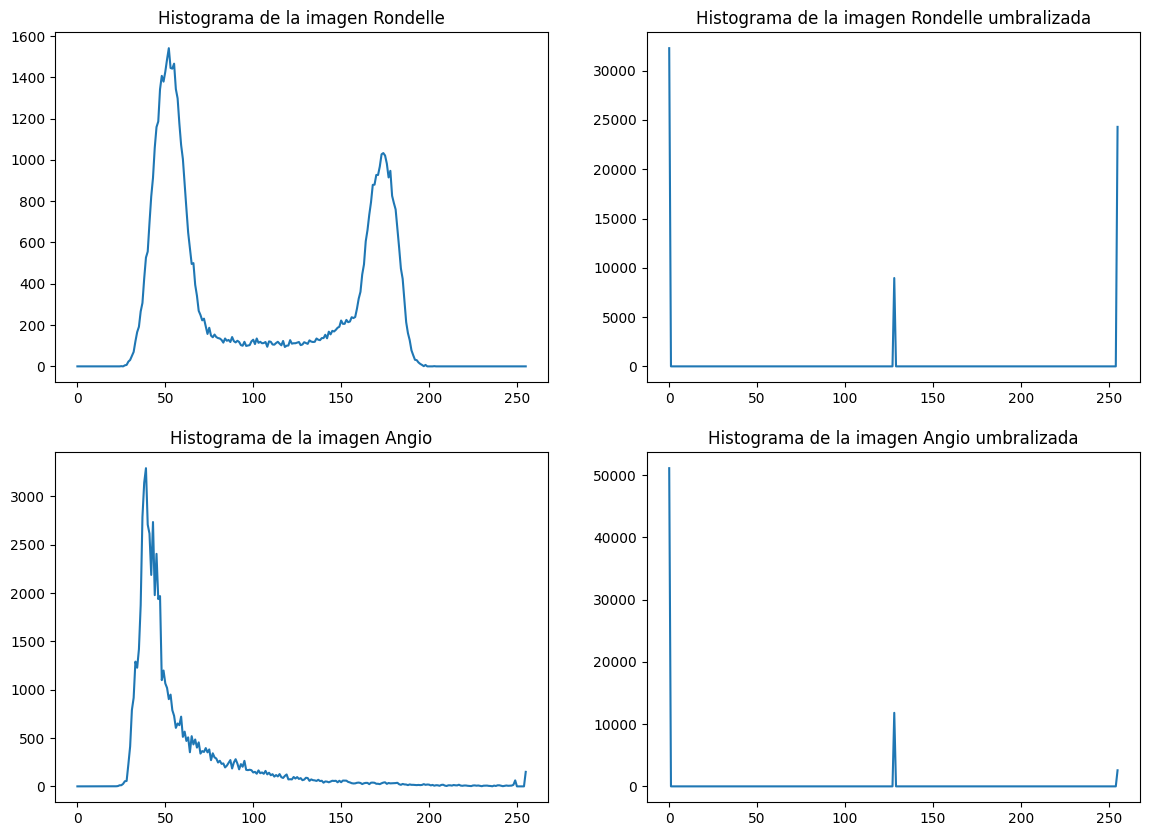

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs[0, 0].plot(hist_RONDELLE)
axs[0, 0].set_title('Histograma de la imagen Rondelle')
axs[0, 1].plot(cv2.calcHist([imagen_RONDELLE_umbralizada.astype('uint8')], [0], None, [256], [0, 256]))
axs[0, 1].set_title('Histograma de la imagen Rondelle umbralizada')
axs[1, 0].plot(hist_ANGIO)
axs[1, 0].set_title('Histograma de la imagen Angio')
axs[1, 1].plot(cv2.calcHist([imagen_ANGIO_umbralizada.astype('uint8')], [0], None, [256], [0, 256]))
axs[1, 1].set_title('Histograma de la imagen Angio umbralizada')
plt.show()

Podemos notar la transformación de la umbralización doble claramente en la comparación de histogramas, donde quedan 3 picos en los valores correspondientes a las clase definidas previamente.

## Deduzca de estos ejemplos el rol y las condiciones de utilización de la umbralización doble. ¿Cómo es el comportamiento (ventajas y desventajas) con respecto a: conectividad, extracción de objetos de formas complejas o ramificadas y calidad de los contornos o fronteras de los objetos extraídos?

La umbralización doble permite segmentar en tres clases de intensidad, permitiendo distinguir los objectos con diferentes niveles de grises en una sola operación. Es útil para separar regiones con intensidades distintas. Las imágenes de este ejercicio nos permiten entender en qué situaciones funciona mejor la umbralización doble. Vamos a evaluar el comportamiento respecto a los siguientes factores:

- **Conectividad**: En RONDELLE funciona bien porque las regiones son compactas y con bordes definidos. En ANGIO no funciona tan bien la umbralización porque continen estructuras finas y al umbralizar, algunos segmentos pierden conectividad. Hay algunos hilos tan finos en la imagen que al umbralizar simplemente quedan en negro.

- **Extracción de objetos complejos o ramificados:** Para objetos simples y compactos como RONDELLE, la umbralización doble da buenos resultados. En Angio, las ramificaciones finas tienen pocos píxeles y su intensidad varía, lo que hace que una misma estructura quede en clases diferentes, perdiendo la estructura completa.

- **Calidad de contornos:** En RONDELLE los contornos son razonablemente buenos porque los bordes del objeto tienen un cambio de intensidad fuerte y la umbralización doble le agrega contraste a estos bordes. En ANGIO los contornos son irregulares y las estructuras son tan delgadas que no se distinguen fácilmente dichos contornos, por lo que se pierden los contornos al aplicar umbralización doble.